In [24]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [25]:
base_results_dir = 'snr_outputs'

# Iterate through all *.pickle files in base_results_dir and load them into a DataFrame
results = []
for file in os.listdir(base_results_dir):
    if file.endswith('.pickle'):
        with open(os.path.join(base_results_dir, file), 'rb') as f:
            t = pickle.load(f)
            t['filename'] = file

            t['nstack*npresums'] = t['nstack'] * t['config']['CHIRP']['num_presums']

            if not "prefix" in t:
                t['prefix'] = "_".join(file.split("_")[:2])

            results.append(t)
snr_results_df = pd.DataFrame(results).set_index('filename')

snr_results_df['campaign'] = ""

for idx, row in snr_results_df.iterrows():
    date = int(row['prefix'][:8])

    if date < 20220905:
        snr_results_df.loc[idx, 'campaign'] = 'iceland'
    elif date < 20230330:
        snr_results_df.loc[idx, 'campaign'] = 'svalbard'
    else:
        snr_results_df.loc[idx, 'campaign'] = 'greenland'

#snr_results_df = snr_results_df[snr_results_df['campaign'] == 'greenland']
snr_results_df

,surface_power_corrected_mean,surface_power_corrected_std,noise_floor,config,nstack,rx_window_modified,run_timestamp,prefix,surface_power_dataset,nstack*npresums,campaign
filename,,,,,,,,,,,
20220901_105725_nstack1000_results.pickle,-25.870097,4.451991,-80.540131,"{'CHIRP': {'max_chirps_per_file': -1, 'num_pre...",1000,blackman,2025-03-12 18:03:35.428820,20220901_105725,"[surface_power, distance_agl, roll, abs_roll, ...",1000,iceland
20230807_115113_nstack100_results.pickle,-18.160698,6.106370,-96.827286,"{'CHIRP': {'num_presums': 10, 'num_pulses': -1...",100,blackman,2025-03-17 20:54:36.441418,20230807_115113,"[surface_power, distance_agl, roll, abs_roll, ...",1000,greenland
20220904_054559_nstack10_results.pickle,-1.317577,3.004996,-70.226814,"{'CHIRP': {'max_chirps_per_file': -1, 'num_pre...",10,blackman,2025-03-12 23:12:43.483303,20220904_054559,"[surface_power, distance_agl, roll, abs_roll, ...",10,iceland
20220904_054559_nstack100_results.pickle,-3.149152,3.405963,-78.878418,"{'CHIRP': {'max_chirps_per_file': -1, 'num_pre...",100,blackman,2025-03-12 22:53:43.022162,20220904_054559,"[surface_power, distance_agl, roll, abs_roll, ...",100,iceland
20220901_105725_nstack100_results.pickle,-15.403788,4.864252,-76.491402,"{'CHIRP': {'max_chirps_per_file': -1, 'num_pre...",100,blackman,2025-03-12 18:07:35.643527,20220901_105725,"[surface_power, distance_agl, roll, abs_roll, ...",100,iceland
20230315_064228_nstack1000_results.pickle,-24.006036,3.261827,-79.087425,"{'CHIRP': {'max_chirps_per_file': -1, 'num_pre...",1000,blackman,2025-03-16 14:04:49.933668,20230315_064228,"[surface_power, distance_agl, roll, abs_roll, ...",1000,svalbard
20220903_035332_nstack100_results.pickle,-12.740036,3.969740,-79.038193,"{'CHIRP': {'max_chirps_per_file': -1, 'num_pre...",100,blackman,2025-03-12 18:56:48.484766,20220903_035332,"[surface_power, distance_agl, roll, abs_roll, ...",100,iceland
20230807_115113_nstack10_results.pickle,-10.628424,3.675164,-86.851715,"{'CHIRP': {'num_presums': 10, 'num_pulses': -1...",10,blackman,2025-03-17 20:58:16.704620,20230807_115113,"[surface_power, distance_agl, roll, abs_roll, ...",100,greenland
20220903_070453_nstack100_results.pickle,-5.136939,4.845907,-77.346878,"{'CHIRP': {'max_chirps_per_file': -1, 'num_pre...",100,blackman,2025-03-12 19:38:13.539779,20220903_070453,"[surface_power, distance_agl, roll, abs_roll, ...",100,iceland


In [26]:
def lookup_in_dict(d, ks):
    if len(ks) == 1:
        return d[ks[0]]
    else:
        return lookup_in_dict(d[ks[0]], ks[1:])

['20220901_095129', 'tx duration: 6.0e-05', 'rx gain: 40', 'tx gain: 65', 'blackman', 'pulse rep int: 3.0e-03', 'iceland']
['20220901_105725', 'tx duration: 6.0e-05', 'rx gain: 40', 'tx gain: 64', 'rectangular', 'pulse rep int: 5.0e-03', 'iceland']
['20220903_035332', 'tx duration: 1.0e-04', 'rx gain: 40', 'tx gain: 64', 'rectangular', 'pulse rep int: 5.0e-03', 'iceland']
['20220903_070453', 'tx duration: 1.5e-04', 'rx gain: 40', 'tx gain: 72', 'rectangular', 'pulse rep int: 5.0e-03', 'iceland']
['20220904_041423', 'tx duration: 1.5e-04', 'rx gain: 40', 'tx gain: 72', 'rectangular', 'pulse rep int: 5.0e-03', 'iceland']
['20220904_054559', 'tx duration: 1.5e-04', 'rx gain: 40', 'tx gain: 72', 'rectangular', 'pulse rep int: 5.0e-03', 'iceland']
['20230315_064228', 'tx duration: 1.5e-04', 'rx gain: 40', 'tx gain: 71', 'rectangular', 'pulse rep int: 5.0e-03', 'svalbard']
['20230315_070941', 'tx duration: 1.5e-04', 'rx gain: 40', 'tx gain: 71', 'rectangular', 'pulse rep int: 5.0e-03', 'sval

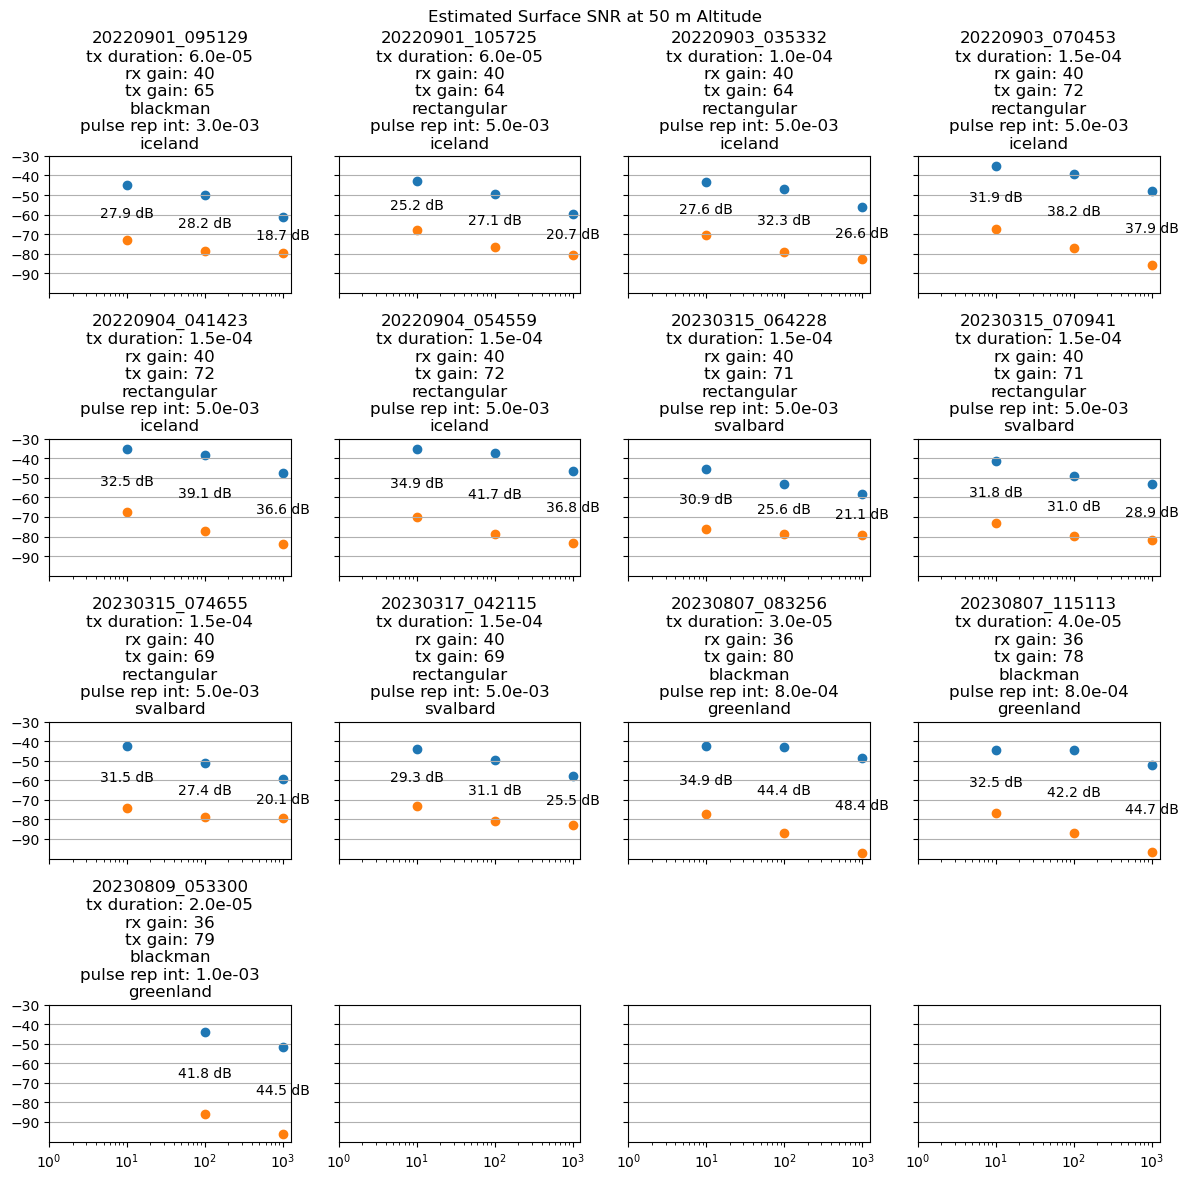

In [27]:
reference_altitude = 50 # m

# Config parameters to show
config_params_subtitle = {
    ('CHIRP', 'tx_duration'): "tx duration: {:.1e}",
    ('RF0', 'rx_gain'): "rx gain: {}",
    ('RF0', 'tx_gain'): "tx gain: {}",
    ('GENERATE', 'window'): "{}",
    ('CHIRP', 'pulse_rep_int'): "pulse rep int: {:.1e}"
}

df_by_prefix = snr_results_df.groupby('prefix')

n_cols = 4
n_rows = int(np.ceil(len(df_by_prefix) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3), sharex=True, sharey=True)
axs = axs.flatten()

for i, (prefix, df) in enumerate(df_by_prefix):
    ax = axs[i]
    #ax.set_title(prefix)

    subtitle_text = [prefix]
    for param_keys, fmt_string in config_params_subtitle.items():
        val = lookup_in_dict(df['config'].iloc[0], param_keys)
        subtitle_text.append(fmt_string.format(val))

    subtitle_text.append(df.iloc[0]['campaign'])

    print(subtitle_text)
    
    ax.set_title("\n".join(subtitle_text))

    surf_pwr = df['surface_power_corrected_mean'] + 10*np.log10(1/(reference_altitude**2))
    nstack = df['nstack'] * df.iloc[0]['config']['CHIRP']['num_presums']

    ax.scatter(nstack, surf_pwr, label='Surface Power [dB]')
    ax.scatter(nstack, df['noise_floor'], label='Noise Floor [dB]')

    snr = surf_pwr - df['noise_floor']
    for n, s, nse in zip(nstack, snr, df['noise_floor']):
        ax.text(n, nse + s/2, f'{s:.1f} dB', ha='center', va='center')

for ax in axs:
    ax.semilogx()
    ax.set_xticks([1, 10, 100, 1000])
    ax.set_yticks(np.arange(-90, -20, 10))
    ax.grid(axis='y')

fig.suptitle(f'Estimated Surface SNR at {reference_altitude} m Altitude')
fig.tight_layout()
plt.show()

In [28]:
np.sum(np.blackman(100)**2)/np.sum(np.ones(100)**2)

0.301554

In [29]:
10*np.log10(np.sum(np.blackman(100)**2)/np.sum(np.ones(100)**2))

-5.206349064024263

R^2: -1.1410876914666739


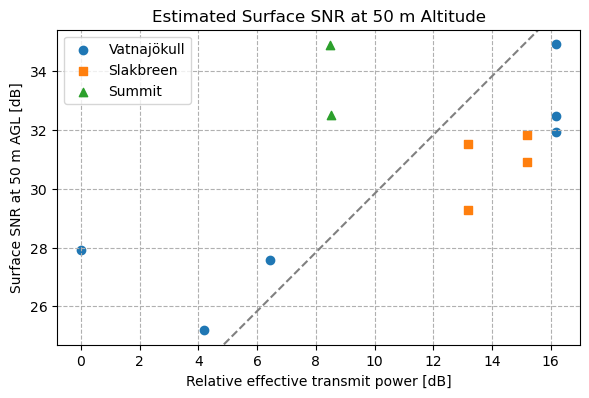

In [30]:
snr_results_nstack10_df = snr_results_df[snr_results_df['nstack*npresums'] == 10]
#snr_results_nstack10_df = snr_results_nstack10_df[snr_results_nstack10_df['campaign'] == 'greenland']

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title(f'Estimated Surface SNR at {reference_altitude} m Altitude') #\n(n_stack=10)')

snrs = []
tx_gains = []
window_types = []
tx_durations = []
rx_gains = []
campaigns = []

effective_tx_gains = []

for idx, row in snr_results_nstack10_df.iterrows():
    surf_pwr = row['surface_power_corrected_mean'] + 10*np.log10(1/(reference_altitude**2))
    snr = surf_pwr - row['noise_floor']
    snrs.append(snr)
    tx_gains.append(row['config']['RF0']['tx_gain'])
    window_types.append(row['config']['GENERATE']['window'])
    tx_durations.append(row['config']['CHIRP']['tx_duration'])
    rx_gains.append(row['config']['RF0']['rx_gain'])
    campaigns.append(row['campaign'])

    pulse_compression_gain = 10*np.log10(row['config']['GENERATE']['chirp_bandwidth'] * row['config']['GENERATE']['chirp_length'])
    tx_power = row['config']['RF0']['tx_gain']
    if row['config']['GENERATE']['window'] == 'blackman':
        window_power = 10*np.log10(np.sum(np.blackman(100)**2)/np.sum(np.ones(100)**2))
    elif row['config']['GENERATE']['window'] == 'rectangular':
        window_power = 0
    else:
        raise Exception(f"Unknown window function: '{row['config']['GENERATE']['window']}'")
    
    effective_tx_gains.append(tx_power + pulse_compression_gain + window_power)


effective_tx_gains = np.array(effective_tx_gains)
effective_tx_gains -= np.min(effective_tx_gains)

snrs = np.array(snrs)

#colors = {'rectangular': 'tab:blue', 'blackman': 'tab:orange'}
colors = {'iceland': 'tab:blue', 'svalbard': 'tab:orange', 'greenland': 'tab:green'}
shapes = {'iceland': 'o', 'svalbard': 's', 'greenland': '^'}

ax.set_xlabel('Relative effective transmit power [dB]')
ax.set_ylabel(f'Surface SNR at {reference_altitude} m AGL [dB]')

for campaign in ['iceland', 'svalbard', 'greenland']:
    mask = np.array(campaigns) == campaign
    ax.scatter(effective_tx_gains[mask], snrs[mask], c=colors[campaign], marker=shapes[campaign], label=campaign)

# Fix limits before adding best fit line
ax.autoscale_view()
ax.set_autoscale_on(False)

# Add a fit line with slope 1
offset_fit = np.mean(snrs - effective_tx_gains)
xs = np.linspace(0, np.max(effective_tx_gains)+5, 10)
ax.plot(xs, xs + offset_fit, '--', c='gray')

# Calculate r^2
y_true = snrs
y_pred = effective_tx_gains + offset_fit
ss_res = np.sum((y_true - y_pred)**2)
ss_tot = np.sum((y_true - np.mean(y_true))**2)
r2 = 1 - ss_res / ss_tot
print(f"R^2: {r2}")

ax.legend(['Vatnajökull', 'Slakbreen', 'Summit'])
#fig.colorbar(sc, label='')
ax.grid(True, which='both', linestyle='--')
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.set_aspect('equal')
fig.tight_layout()

#fig.savefig('tx_power_vs_snr.png', dpi=300)

In [31]:
# alts = []
# snrs = []

# for idx, row in snr_results_nstack10_df.iterrows():
#     surf_pwr = row['surface_power_corrected_mean'] + 10*np.log10(1/(reference_altitude**2))
#     snr_ref = surf_pwr - row['noise_floor']

#     print(row['surface_power_dataset'])

#     s = (row['surface_power_dataset']['surface_power'].to_numpy() - snr_ref - row['noise_floor']).to_numpy()

#     snrs.extend(s)
#     alts.extend(row['surface_power_dataset']['reflection_distance'])


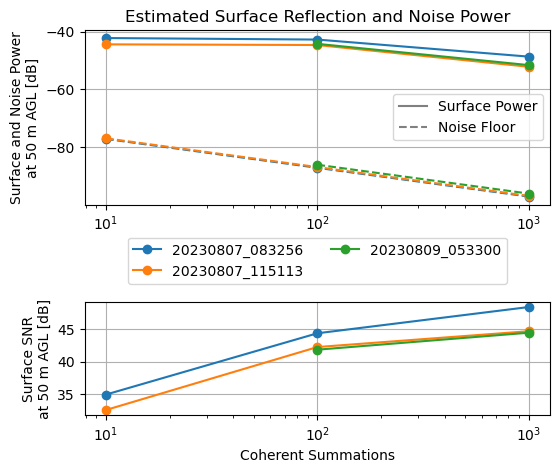

In [32]:
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(3, 1)

ax = fig.add_subplot(gs[:2, :])
ax_snr = fig.add_subplot(gs[2, :], sharex=ax)

ax.set_title(f'Estimated Surface Reflection and Noise Power')

for i, (prefix, df) in enumerate(df_by_prefix):
    surf_pwr = df['surface_power_corrected_mean'] + 10*np.log10(1/(reference_altitude**2))
    snr = surf_pwr - df['noise_floor']
    nstack = df['nstack'] * df.iloc[0]['config']['CHIRP']['num_presums']

    order = np.argsort(nstack)

    if df.iloc[0]['campaign'] == 'greenland':
        p = ax.plot(nstack[order], surf_pwr[order], label=prefix, marker='o')
        ax.plot(nstack[order], df['noise_floor'][order], c=p[0].get_color(), linestyle='--', marker='o')

        ax_snr.plot(nstack[order], snr[order], label=prefix, marker='o', c=p[0].get_color())

ax_snr.set_xlabel('Coherent Summations')
ax.set_ylabel(f'Surface and Noise Power\nat {reference_altitude} m AGL [dB]')

ax.semilogx()
#ax.set_xticks([1, 10, 100, 1000])
# ax.grid(axis='y')

# Add legend outside plot
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.3, box.width, box.height * 0.7])
# Add legend below ax
flight_legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
ax.add_artist(flight_legend)

# Add an additiona legend within ax with a gray solid line for surface power and a gray dashed line for noise floor
surf_pwr_leg = ax.plot([], [], '-', color='gray', label='Surface Power')
noise_pwr_leg = ax.plot([], [], '--', color='gray', label='Noise Floor')
ax.legend([surf_pwr_leg[0], noise_pwr_leg[0]], ['Surface Power', 'Noise Floor'], loc='center right')

ax.grid()
ax_snr.grid()
ax_snr.set_ylabel(f'Surface SNR\nat {reference_altitude} m AGL [dB]')

fig.savefig('greenland_snr.png', dpi=300)
#fig.tight_layout()